<a href="https://colab.research.google.com/github/younes-code/Chekpoint-2/blob/main/Deep_learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("heart.csv")

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [83]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [85]:
df.columns = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
              'exercise_angina', 'oldpeak', 'slope', 'fluroscopy_vessels', 
              'thal', 'heart_disease']

In [86]:
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,slope,fluroscopy_vessels,thal,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [87]:
df.isnull().sum().sum()

0

In [88]:
categorical = ['sex', 'chest_pain', 'fasting_blood_sugar', 'resting_ecg', 
               'exercise_angina', 'heart_disease', 'slope', 'fluroscopy_vessels']
numerical = [col for col in df.columns if col not in categorical]

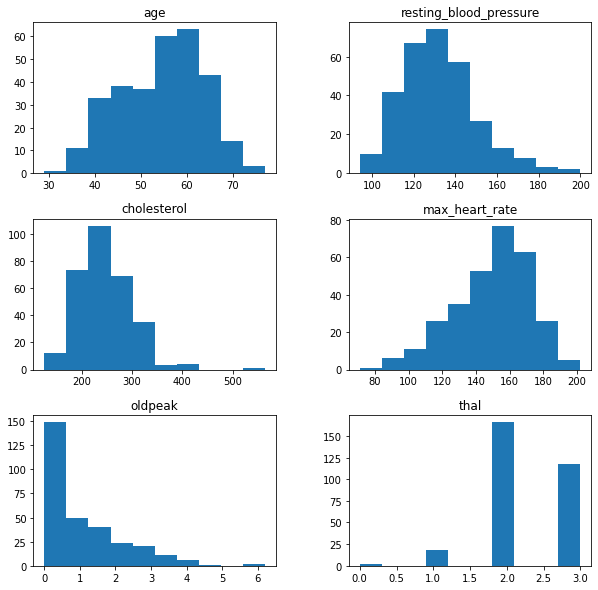

In [89]:
df[numerical].hist(figsize=(10, 10), grid=False);


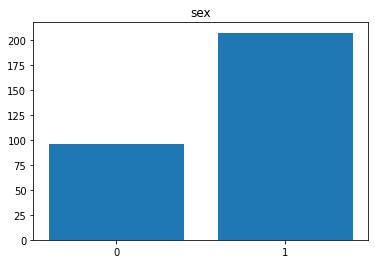

1    207
0     96
Name: sex, dtype: int64


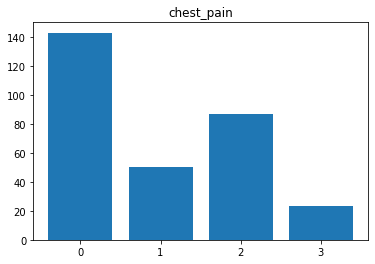

0    143
2     87
1     50
3     23
Name: chest_pain, dtype: int64


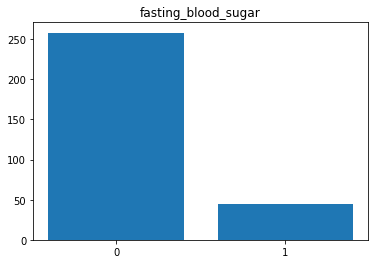

0    258
1     45
Name: fasting_blood_sugar, dtype: int64


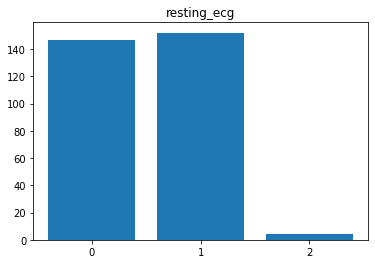

1    152
0    147
2      4
Name: resting_ecg, dtype: int64


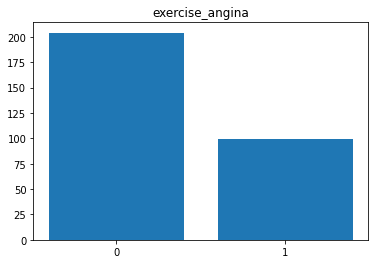

0    204
1     99
Name: exercise_angina, dtype: int64


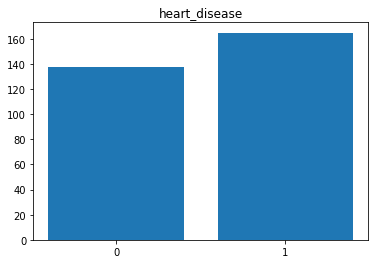

1    165
0    138
Name: heart_disease, dtype: int64


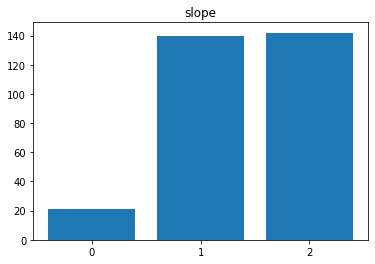

2    142
1    140
0     21
Name: slope, dtype: int64


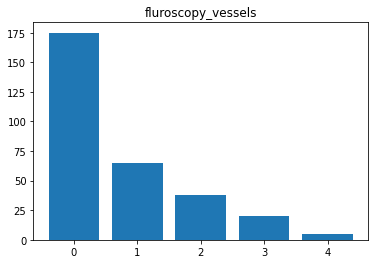

0    175
1     65
2     38
3     20
4      5
Name: fluroscopy_vessels, dtype: int64


In [90]:
for col in categorical:
    counts = df[col].value_counts()
    positions = counts.index
    plt.bar(positions, counts.values, tick_label=positions)
    plt.title(col)
    plt.show();
    print(counts)

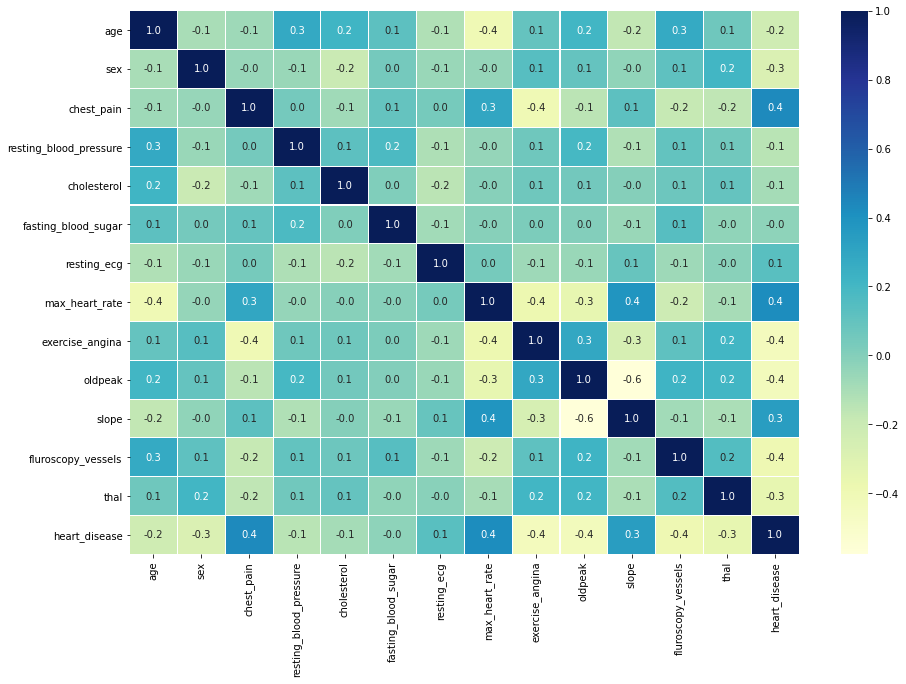

In [91]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True, cmap = 'YlGnBu' ,linewidths=.1, fmt= '.1f',ax=ax)

Linear regression

In [104]:
X = df["max_heart_rate"].values.reshape(-1,1)
y= df["heart_disease"]
SEED=30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=SEED)


In [106]:
from sklearn.metrics import r2_score , mean_squared_error
model=LinearRegression()

model.fit(X_train,y_train)

pred=model.predict(X_test)

print("MSE ",mean_squared_error(y_test,pred))
print("R^2 ",r2_score(y_test,pred))

MSE  0.20919481517453442
R^2  0.1234077620895917


Text(0.05, 0.5, '$y = 0.01 x_1 - 0.88 $')

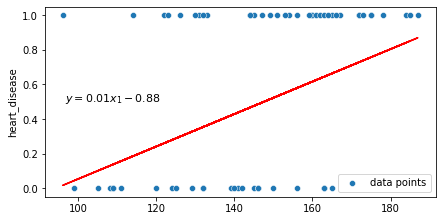

In [107]:
fig, ax = plt.subplots(figsize=(7, 3.5))

sns.scatterplot(X_test.squeeze(),y_test,label="data points",ax=ax)
plt.plot(X_test.squeeze(),pred,color="r",label="regression model")
ax.text(0.05, 0.50, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=11, transform=ax.transAxes)

Multi-linear regression :

In [113]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

In [115]:

x=df[['age','sex','chest_pain','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_angina','oldpeak','slope','fluroscopy_vessels','thal']]
y=df['heart_disease'].values
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.20,random_state=30)

In [116]:
model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 0.12491183815270222
R squared 0.476580011524544


Logistic regression

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
x=df[['age','sex','chest_pain','resting_blood_pressure','cholesterol','fasting_blood_sugar','resting_ecg','max_heart_rate','exercise_angina','oldpeak','slope','fluroscopy_vessels','thal']]
y = df['heart_disease']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)  
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))  #testing model’s performance

Accuracy=0.84


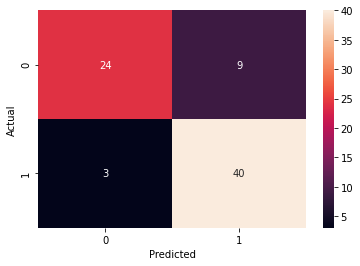

In [119]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.82      0.93      0.87        43

    accuracy                           0.84        76
   macro avg       0.85      0.83      0.83        76
weighted avg       0.85      0.84      0.84        76



In [121]:
from sklearn.metrics import roc_curve, roc_auc_score
# calculate scores
y_auc = roc_auc_score(y_test, y_pred)

# summarize scores
print('Logistic: ROC AUC=%.3f' % (y_auc))

# calculate roc curves
y_fpr, y_tpr, _ = roc_curve(y_test, y_pred)

Logistic: ROC AUC=0.829


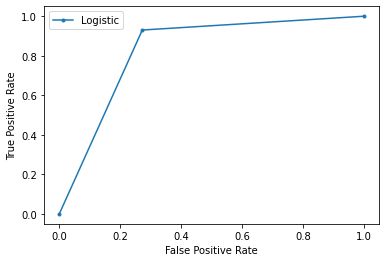

In [123]:
# plot the roc curve for the model
from matplotlib import *

pyplot.plot(y_fpr, y_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()